# Bolt Take Home test 

**Goal:** Understand if our supply volume matches the demand that we have. If it does not, we need to pinpoint the peak hours and come up with recommended actions.

# Supply 

In my own words, I would define Supply as the optimal amount of resources to convert all demand into revenue. Ideally, every user that visits Bolt would have 100% coverage, be able to have the ride accepted quickly and reach the destination. However, due to several reasons, i.e. competiotion, traffic, seasonality, events or lack of drivers, it is not always possible to capture 100% of demand.

To define supply we have several candidates: 
1. Active Drivers - over estimation of supply. Why ? Being active does not mean available for pick-up. If all active drivers are busy, supply is still low.
2. Finished Rides - 
3. Free Drivers - A part of Active Drivers is busy (has a booking), so we can normalize Active developers by how busy they are. 

We will go with option 3.

# Demand 

We are defining effective demand as the numbers riders that saw +1 car. We are excluding Riders that saw 0 cars because they are not eligible, however it is very important to look at the Coverage Ratio

In [793]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

supply = pd.read_csv("supply.csv")
demand = pd.read_csv("demand.csv")

## Initial Insights 

In [924]:
supply.corr()

,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Hours per active driver,Rides per online hour,Finished Rides
Active drivers,1.000000,0.950618,0.607096,0.796218,0.221033,0.247606,0.592784
Online (h),0.950618,1.000000,0.584240,0.868994,0.450896,0.182245,0.577291
Has booking (h),0.607096,0.584240,1.000000,0.108363,0.155804,0.748253,0.932812
Waiting for booking (h),0.796218,0.868994,0.108363,1.000000,0.453683,-0.231360,0.123342
Hours per active driver,0.221033,0.450896,0.155804,0.453683,1.000000,-0.100327,0.190516
Rides per online hour,0.247606,0.182245,0.748253,-0.231360,-0.100327,1.000000,0.794784
Finished Rides,0.592784,0.577291,0.932812,0.123342,0.190516,0.794784,1.000000


In [925]:
demand.corr()

,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (%)
People saw 0 cars (unique),1.000000,0.480051,-0.515691
People saw +1 cars (unique),0.480051,1.000000,0.234333
Coverage Ratio (%),-0.515691,0.234333,1.000000


In [794]:
# joining the table to see both supply & demand in one df
supply = supply.set_index('Date')
demand = demand.set_index('Date')

sd = pd.concat([supply, demand], axis=1, join="inner")
sd = sd.fillna(0)
sd.reset_index(inplace=True)

In [795]:
sd['Date'] = pd.to_datetime(sd['Date'])
sd['Hour'] = sd['Date'].dt.hour
sd["Day of Week"] = sd['Date'].dt.dayofweek
sd["Is Weekend"] = sd['Date'].dt.dayofweek > 4
sd['Is Holyday'] = sd['Date'] > '2016-12-12'
sd['Date'] = sd['Date'].dt.date

sd['Demand'] = sd['People saw +1 cars (unique)']
busy_ratio = (sd['Has booking (h)'] / sd['Online (h)'])
sd['Free Drivers'] = sd['Active drivers'] * (1-busy_ratio)

#supply['Online time per driver'] = supply['Online (h)'] / supply['Active drivers']
#supply['Booking time per driver'] = supply['Has booking (h)'] / supply['Active drivers']
#supply['Waiting time per driver'] = supply['Waiting for booking (h)'] / supply['Active drivers']


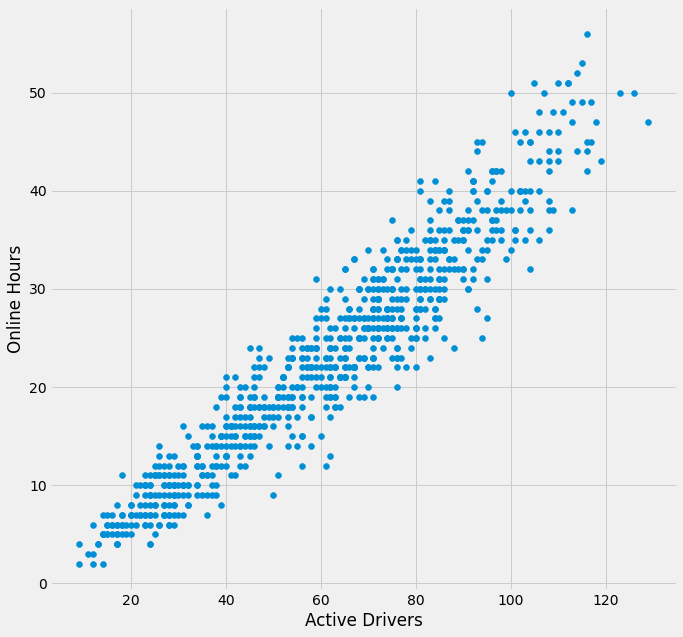

In [796]:
# investigate if there is a linear relationship between active drivers and Online hours.

fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.scatter(sd['Active drivers'], sd['Online (h)'])
plt.xlabel("Active Drivers")
plt.ylabel("Online Hours")
plt.show()

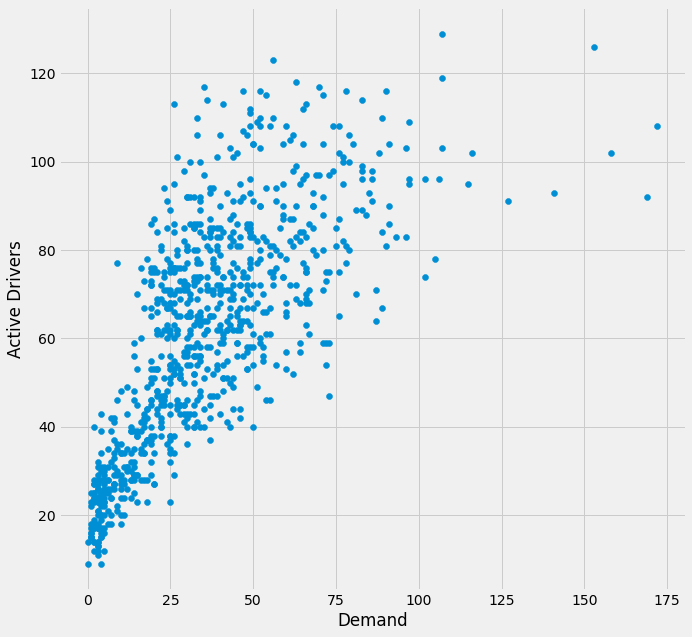

In [797]:
# investigate if there is a relation between high demand and business

fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.scatter(sd['Demand'], sd['Active drivers'])
plt.xlabel("Demand")
plt.ylabel("Active Drivers")
plt.show()

It is expected that, as demand increases, the number of drivers also increases. Although the relationship is not linear. However, as there is more demand, drivers will get busier and spend less time waiting for bookings.

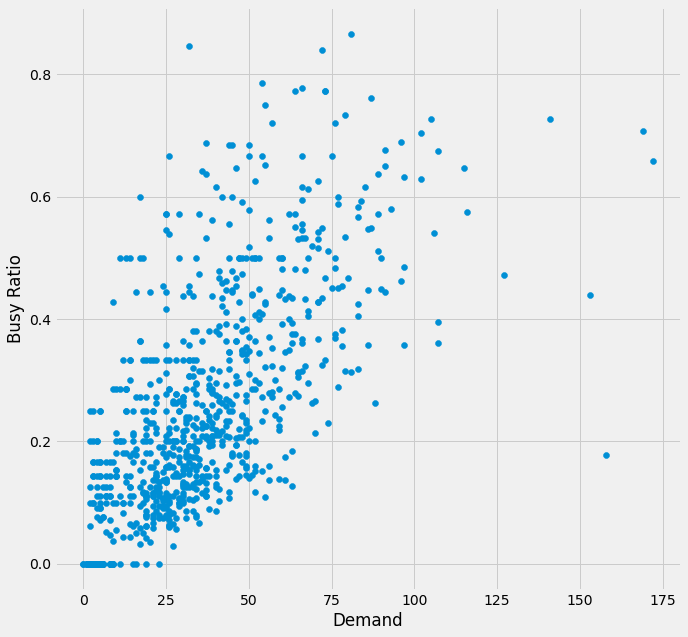

In [798]:
# investigate if there is a relation between high demand and business

fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.scatter(sd['Demand'], busy_ratio)
plt.xlabel("Demand")
plt.ylabel("Busy Ratio")
plt.show()

In [799]:
sd.head()

,Date,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Hours per active driver,Rides per online hour,Finished Rides,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (%),Hour,Day of Week,Is Weekend,Is Holyday,Demand,Free Drivers
0,2016-12-18,52,18,6,11,0.3,0.67,12.0,9,32,78,23,6,True,True,32,34.666667
1,2016-12-18,59,20,11,9,0.3,1.40,28.0,29,64,69,22,6,True,True,64,26.550000
2,2016-12-18,72,25,7,18,0.3,0.64,16.0,5,39,89,21,6,True,True,39,51.840000
3,2016-12-18,86,29,7,23,0.3,0.52,15.0,13,48,79,20,6,True,True,48,65.241379
4,2016-12-18,82,31,14,17,0.4,1.16,36.0,12,77,87,19,6,True,True,77,44.967742


In [973]:
sd.describe()

,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Hours per active driver,Rides per online hour,Finished Rides,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (%),Hour,Day of Week,Demand,Free Drivers,net_income_per_driver,net_income_per_hour
count,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000
mean,61.648391,23.215733,6.315852,16.914184,0.370083,0.569464,13.990465,12.240763,36.041716,75.661502,11.507747,3.001192,36.041716,44.677813,4.592441,111.923719
std,25.928193,11.095697,5.535662,9.068937,0.068212,0.385772,11.540110,16.602303,25.160951,18.342403,6.926799,2.002087,25.160951,20.986116,3.169741,92.320878
min,9.000000,2.000000,0.000000,2.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.153846,0.000000,0.000000
25%,41.000000,14.000000,2.000000,10.000000,0.300000,0.290000,5.500000,3.000000,19.000000,66.000000,6.000000,1.000000,19.000000,27.623932,2.325581,44.000000
50%,63.000000,23.000000,5.000000,16.000000,0.400000,0.500000,11.000000,6.000000,32.000000,80.000000,12.000000,3.000000,32.000000,42.187500,3.961905,88.000000
75%,80.500000,31.000000,9.000000,23.000000,0.400000,0.790000,20.000000,14.000000,49.000000,89.000000,17.500000,5.000000,49.000000,59.868687,6.349206,160.000000
max,129.000000,56.000000,29.000000,48.000000,0.600000,2.030000,62.000000,129.000000,172.000000,100.000000,23.000000,6.000000,172.000000,109.200000,18.955823,496.000000


## Q1: Identify peak times of undersupply

<AxesSubplot:xlabel='Date'>

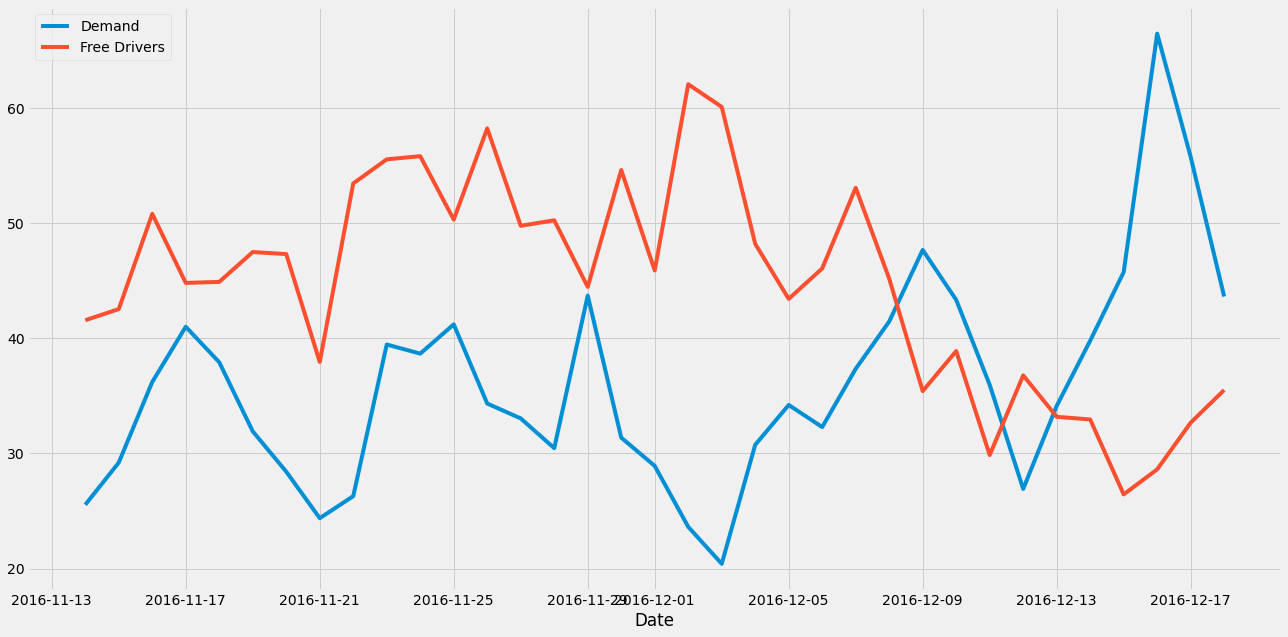

In [985]:
sd.groupby('Date')['Demand'].mean().plot(legend=True)
sd.groupby('Date')['Free Drivers'].mean().plot(legend=True, figsize=(20, 10))

<AxesSubplot:xlabel='Date'>

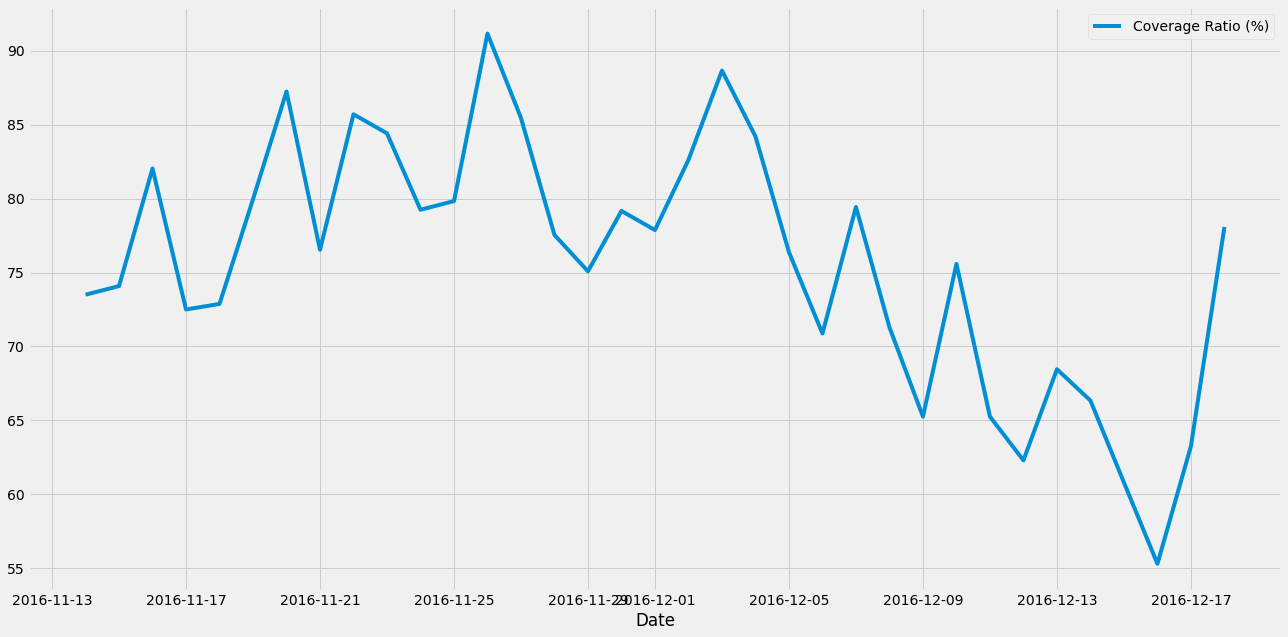

In [802]:
sd.groupby('Date')['Coverage Ratio (%)'].mean().plot(legend=True, figsize=(20, 10))


As we look at the data as a whole, we are able to identify two periods with distinct behaviors: 

1. From Nov 14th until the beginning of December (first two weeks), where supply and demand follow similar trend over time 
2. The last week of the year shows a huge spike on Demand, probably due to the holiday season, while observing a decrease in Supply. 

We should distinguish these dates separately, because results can be skewed due to the holiday season.

## Supply-Demand Gap - Hourly 

<AxesSubplot:xlabel='Hour'>

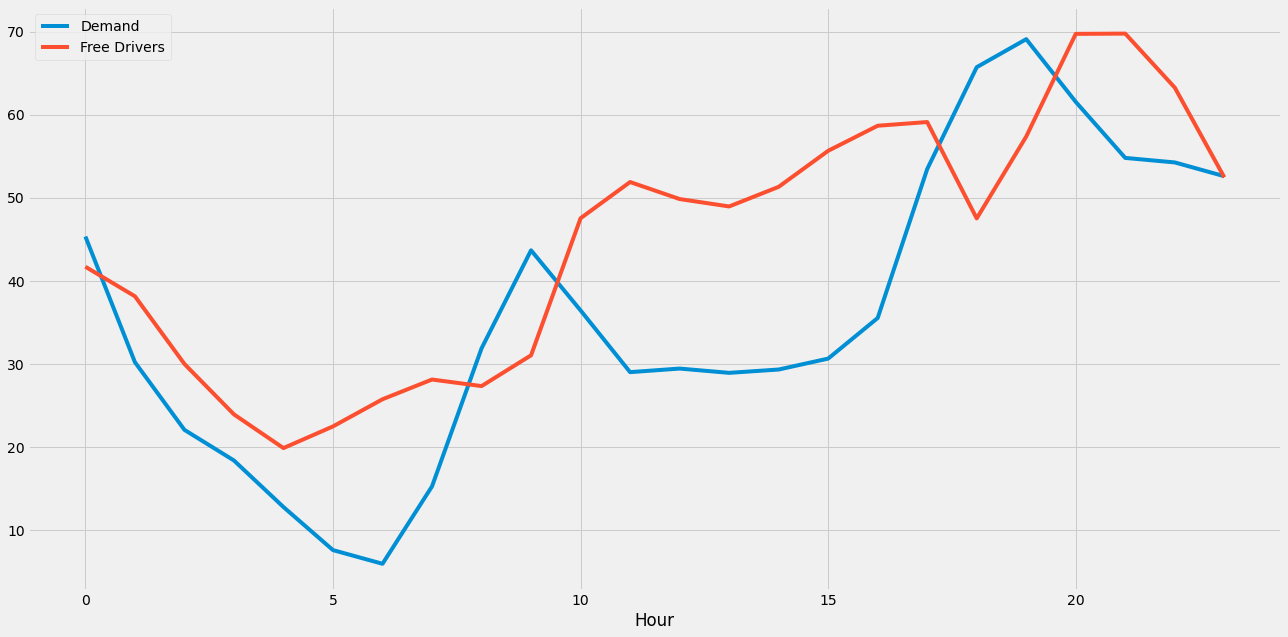

In [986]:
sd.groupby('Hour')['Demand'].mean().plot(legend=True, figsize=(20,10))
sd.groupby('Hour')['Free Drivers'].mean().plot(legend=True)

<AxesSubplot:xlabel='Hour'>

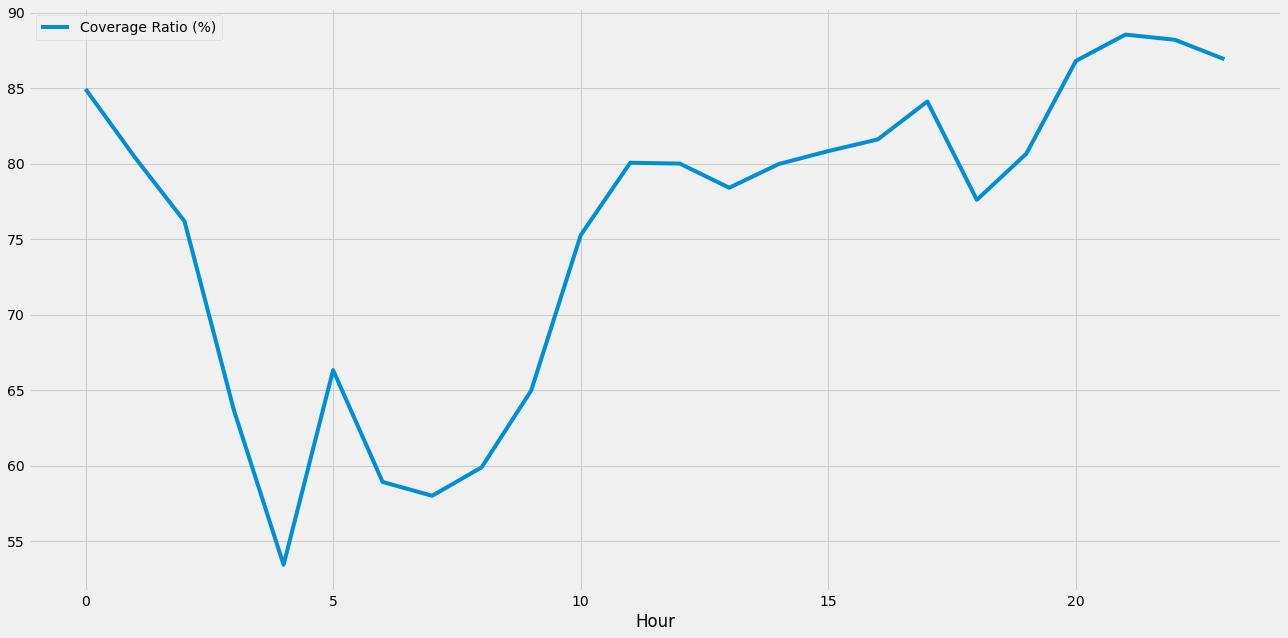

In [804]:
sd.groupby('Hour')['Coverage Ratio (%)'].mean().plot(legend=True, figsize=(20, 10))

Peak hours occurr, aproximately, from 7am-10am and from 5pm-8pm. Probably, because people are going and coming back from work.

However, this pattern might suffer changes depending on the day of the week. below we run a Daily analysis 

## Supply-Demand Gap - Daily 

<AxesSubplot:xlabel='Day of Week,Hour'>

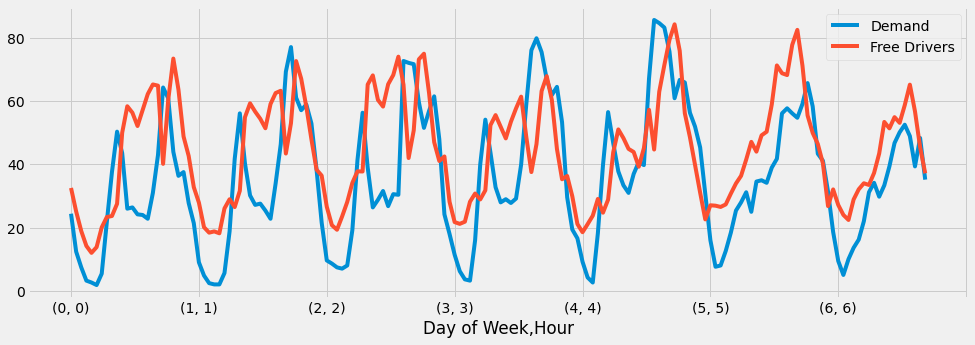

In [805]:
sd.groupby(['Day of Week','Hour'])['Demand'].mean().plot(legend=True, figsize=(15,5))
sd.groupby(['Day of Week','Hour'])['Free Drivers'].mean().plot(legend=True)

<AxesSubplot:xlabel='Day of Week,Hour'>

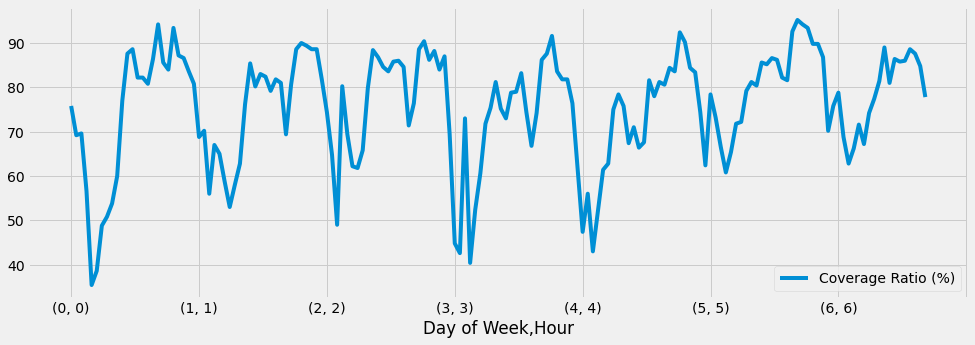

In [806]:
sd.groupby(['Day of Week','Hour'])['Coverage Ratio (%)'].mean().plot(legend=True, figsize=(15,5))


<AxesSubplot:xlabel='Day of Week,Hour'>

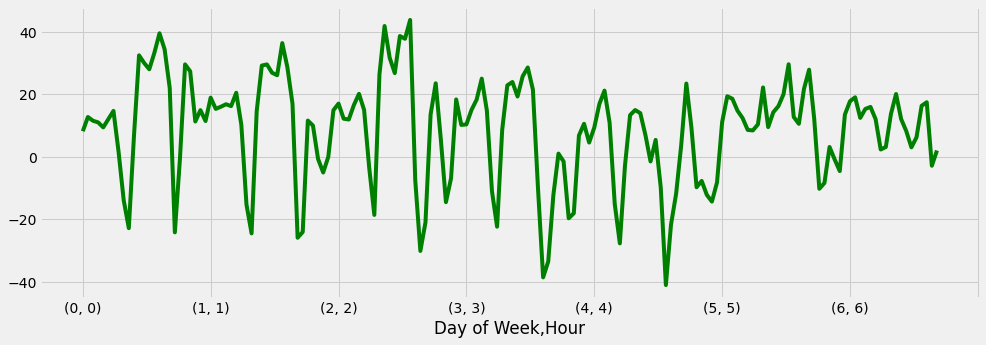

In [807]:
sd_gap = -sd.groupby(['Day of Week','Hour'])['Demand'].mean() + sd.groupby(['Day of Week','Hour'])['Free Drivers'].mean()
color = ['r' if y < 0 else 'g' for y in sd_gap]
sd_gap.plot(figsize=(15,5), color='g')


Weekend Gap is clearly lower than the gap we face during the week.  

### Weekends - Hourly

<AxesSubplot:xlabel='Hour'>

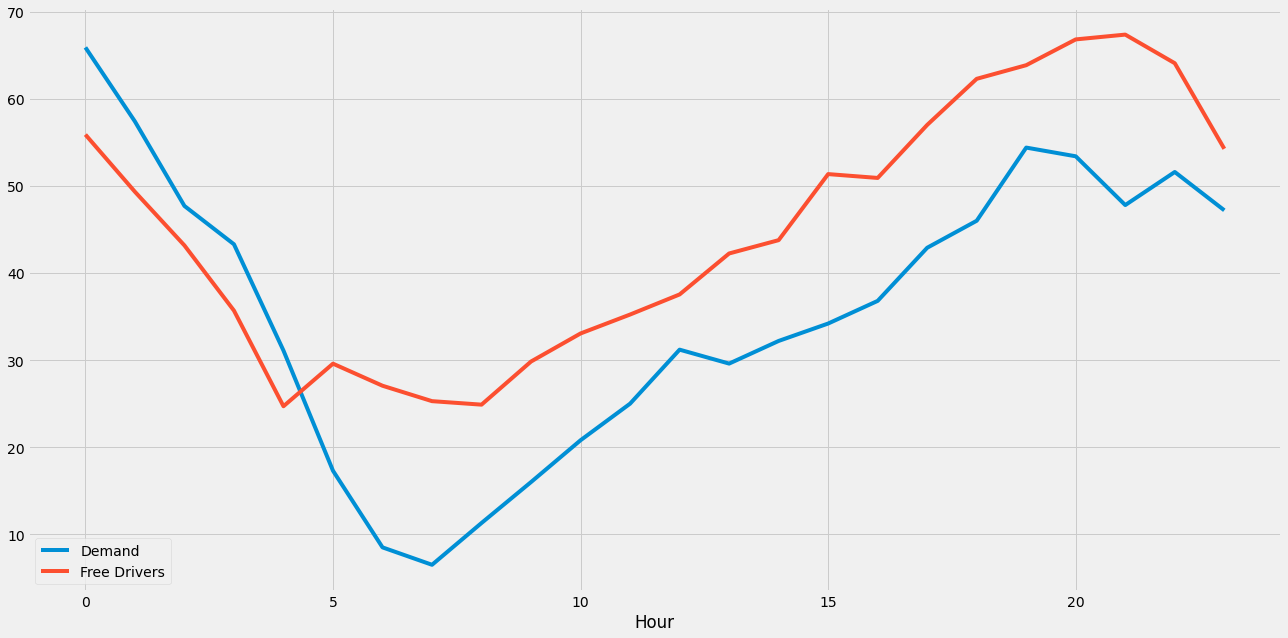

In [808]:
sd[sd['Is Weekend'] == True].groupby('Hour')['Demand'].mean().plot(legend=True, figsize=(20,10))
sd[sd['Is Weekend'] == True].groupby('Hour')['Free Drivers'].mean().plot(legend=True)

During the weekend, peaks occurr more in the early morning (2am-5am). We clearly see a higher amount of Active Drivers during this period. Are drivers more available during the weekend ? double jobs to get extra income ? however, the number of finished rides does not increase considerably. Why ? 

### Fridays

<AxesSubplot:xlabel='Hour'>

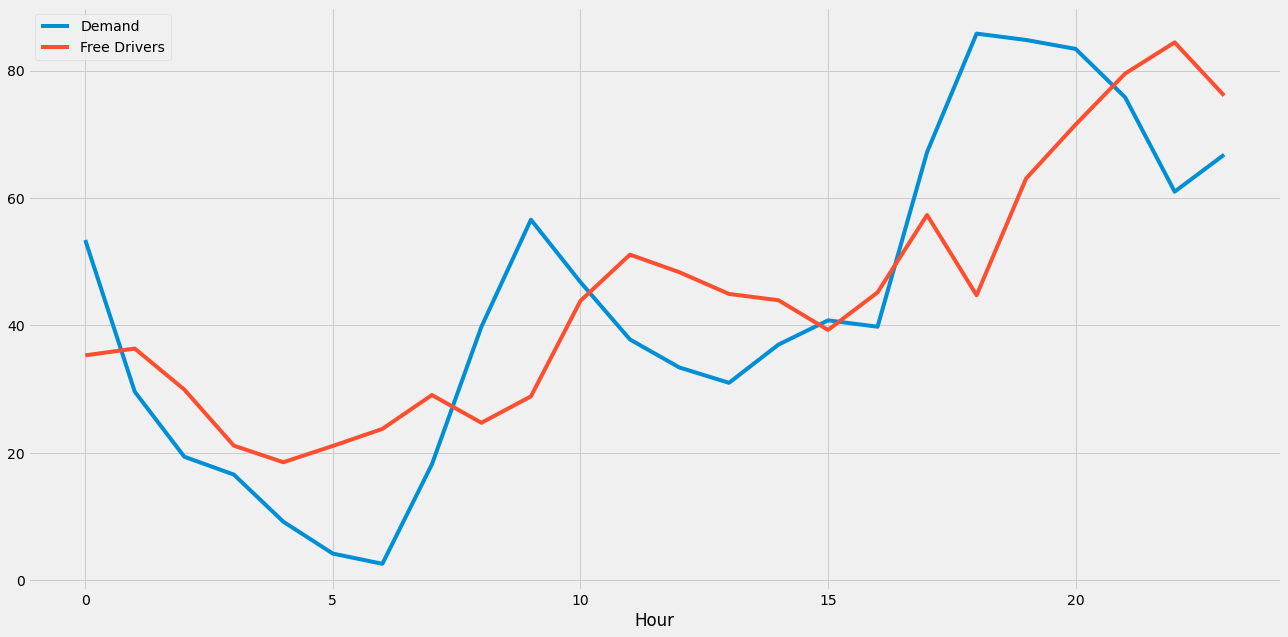

In [987]:
sd[sd['Day of Week'] == 4].groupby('Hour')['Demand'].mean().plot(legend=True, figsize=(20,10))
sd[sd['Day of Week'] == 4].groupby('Hour')['Free Drivers'].mean().plot(legend=True)

### Holyday Season


<AxesSubplot:xlabel='Hour'>

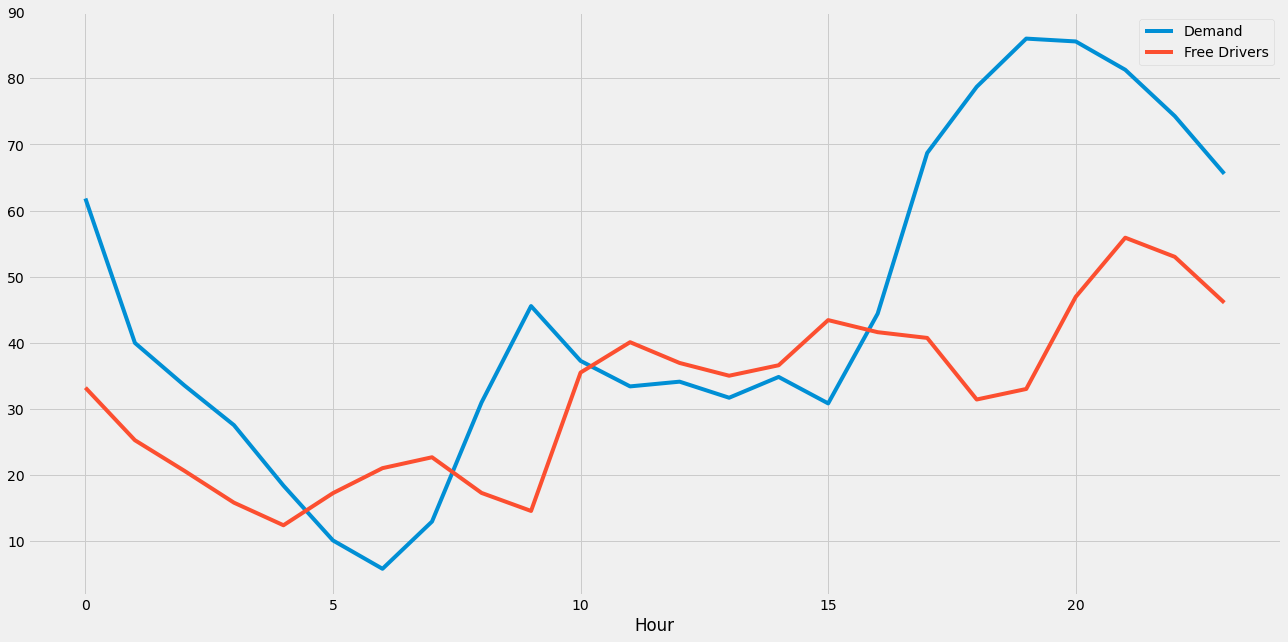

In [988]:
sd[sd['Is Holyday'] == True].groupby('Hour')['Demand'].mean().plot(legend=True, figsize=(20,10))
sd[sd['Is Holyday'] == True].groupby('Hour')['Free Drivers'].mean().plot(legend=True)

In [989]:
sd_gap_weekdays = -(sd[sd['Is Weekend'] == False].groupby('Hour')['Demand'].mean() - sd[sd['Is Weekend'] == False].groupby('Hour')['Free Drivers'].mean())
sd_gap_weekend = -(sd[sd['Is Weekend'] == True].groupby('Hour')['Demand'].mean() - sd[sd['Is Weekend'] == True].groupby('Hour')['Free Drivers'].mean())
sd_gap_friday = -(sd[sd['Day of Week'] == 4].groupby('Hour')['Demand'].mean() - sd[sd['Day of Week'] == 4].groupby('Hour')['Free Drivers'].mean())
sd_gap_holiday = -(sd[sd['Is Holyday'] == True].groupby('Hour')['Demand'].mean() - sd[sd['Is Holyday'] == True].groupby('Hour')['Free Drivers'].mean())

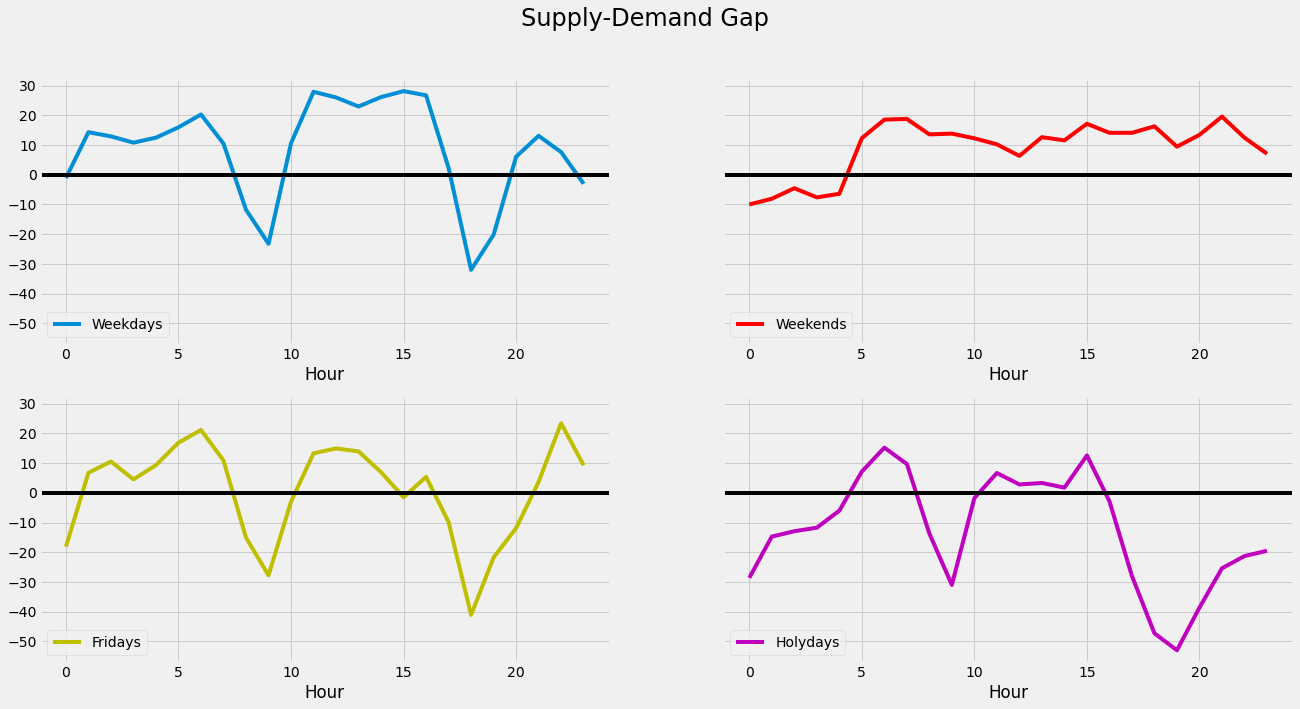

In [991]:
#create subplot figure with having two side by side plots
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(20,10),sharey=True)

# plot first pandas frame in subplot style
sd_gap_weekdays.plot(ax = axes[0,0],subplots=True, label='Weekdays') 
axes[0,0].axhline(0, color='black')
axes[0,0].legend(loc="lower left")

# plot second pandas frame in subplot style
sd_gap_weekend.plot(ax = axes[0,1],subplots=True, label='Weekends', color='r')
axes[0,1].axhline(0, color='black')
axes[0,1].legend(loc="lower left")

# plot third pandas frame in subplot style
sd_gap_friday.plot(ax = axes[1,0],subplots=True, label='Fridays', color='y')
axes[1,0].axhline(0, color='black')
axes[1,0].legend(loc="lower left")

# plot second pandas frame in subplot style
sd_gap_holiday.plot(ax = axes[1,1],subplots=True, label='Holydays', color='m')
axes[1,1].axhline(0, color='black')
axes[1,1].legend(loc="lower left")

plt.ylabel('sd-gap')
plt.suptitle('Supply-Demand Gap', fontsize=24)
plt.show()

Peak hours are: 
- 7am-10am and 5pm on weekdays 
- 12am-4am Weekends
- both on holidays

In [831]:
def is_peak(x):    
    if x['Is Weekend'] == False:
        return x['Hour'] in ([7,8,9,17,18,19])
    else:
        return x['Hour'] in ([0,1,2,3,4])

sd['is_peak'] = sd.apply(lambda x: is_peak(x), axis=1)
sd.head()

,Date,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Hours per active driver,Rides per online hour,Finished Rides,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (%),Hour,Day of Week,Is Weekend,Is Holyday,Demand,Free Drivers,is_peak
0,2016-12-18,52,18,6,11,0.3,0.67,12.0,9,32,78,23,6,True,True,32,34.666667,False
1,2016-12-18,59,20,11,9,0.3,1.40,28.0,29,64,69,22,6,True,True,64,26.550000,False
2,2016-12-18,72,25,7,18,0.3,0.64,16.0,5,39,89,21,6,True,True,39,51.840000,False
3,2016-12-18,86,29,7,23,0.3,0.52,15.0,13,48,79,20,6,True,True,48,65.241379,False
4,2016-12-18,82,31,14,17,0.4,1.16,36.0,12,77,87,19,6,True,True,77,44.967742,False


## Q2: Calculate the number of online hours required to ensure that we have a good Coverage Ratio during peak hours 

In [993]:
sd_peak = sd[sd['is_peak'] ==True]
sd_peak.corr()['Free Drivers']

Active drivers                 0.696968
Online (h)                     0.725221
Has booking (h)               -0.194634
Waiting for booking (h)        0.966612
Hours per active driver        0.330367
Rides per online hour         -0.709221
Finished Rides                -0.181632
People saw 0 cars (unique)    -0.647739
People saw +1 cars (unique)    0.032383
Coverage Ratio (%)             0.804773
Hour                           0.286262
Day of Week                    0.016422
Is Weekend                     0.018739
Is Holyday                    -0.391581
Demand                         0.032383
Free Drivers                   1.000000
is_peak                             NaN
net_income_per_driver         -0.686066
net_income_per_hour           -0.181632
Name: Free Drivers, dtype: float64

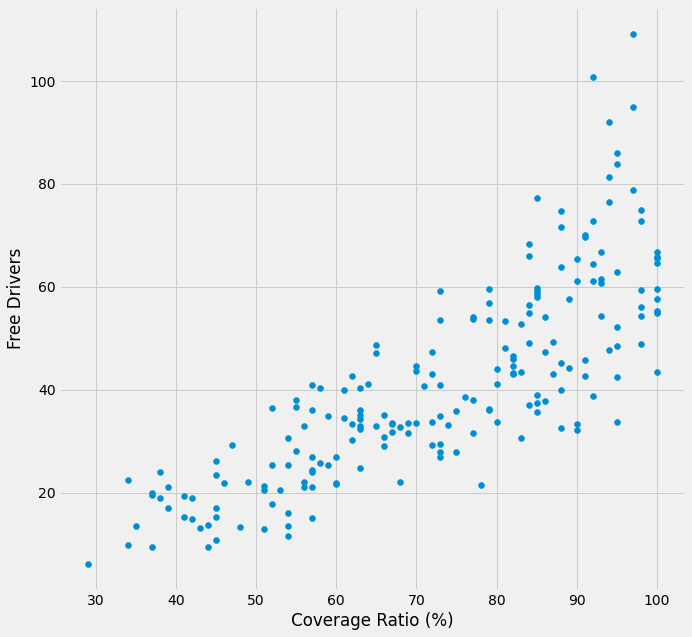

In [995]:
# investigate if there is a linear relationship between active drivers and Online hours.

fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.scatter(sd_peak['Coverage Ratio (%)'], sd_peak['Free Drivers'])
plt.ylabel("Free Drivers")
plt.xlabel("Coverage Ratio (%)")
plt.show()

In [981]:
# Polynomial Regression
def polyfit(x, y, degree):
    results = {}

    coeffs = np.polyfit(x, y, degree)

     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    # r-squared
    p = np.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)                         # or [p(z) for z in x]
    ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results['determination'] = ssreg / sstot

    return results

{'polynomial': [0.34595392745916953, 2.0540974948577673], 'determination': 0.42795018717157113}


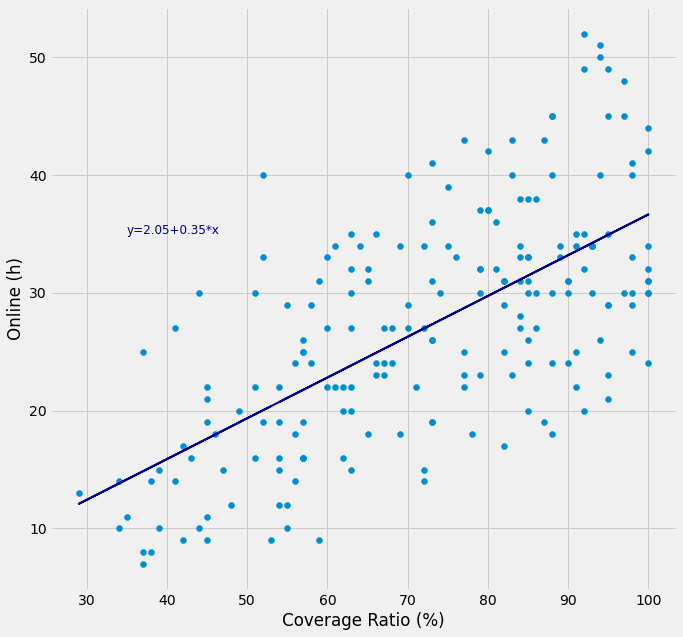

In [982]:
# investigate if there is a linear relationship between active drivers and Online hours.

X = sd_peak['Coverage Ratio (%)']
y = sd_peak['Online (h)']


fit = polyfit(X,y, 1)
print(fit)

fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.scatter(X, y)

# regression line
plt.plot(X, fit["polynomial"][0] * X + fit["polynomial"][1], color='darkblue', linewidth=2)
plt.text(35, 35, 'y={:.2f}+{:.2f}*x'.format(fit["polynomial"][1], fit["polynomial"][0]), color='darkblue', size=12)

plt.ylabel("Online (h)")
plt.xlabel("Coverage Ratio (%)")
plt.show()

In [877]:
fit[0] * 90 + fit[1]

33.18995096618303

In order to have on average 60 Free Drivers available and hence a coverage ratio of at least 80% during peak hours, we will need to guarantee ~34 Online hours. 

## Q3: Calculate how much earning we can guarantee so that we can attract more supply. 

In [836]:
sd_peak.head()

,Date,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Hours per active driver,Rides per online hour,Finished Rides,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (%),Hour,Day of Week,Is Weekend,Is Holyday,Demand,Free Drivers,is_peak
19,2016-12-18,46,16,12,4,0.3,1.88,30.0,47,55,54,4,6,True,True,55,11.500000,True
20,2016-12-18,54,23,10,12,0.4,1.17,27.0,15,72,83,3,6,True,True,72,30.521739,True
21,2016-12-18,68,25,7,18,0.4,1.00,25.0,1,64,98,2,6,True,True,64,48.960000,True
22,2016-12-18,79,25,13,12,0.3,1.16,29.0,21,69,77,1,6,True,True,69,37.920000,True
23,2016-12-18,89,35,11,24,0.4,1.03,36.0,7,81,92,0,6,True,True,81,61.028571,True


In [967]:
sd.describe()

,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Hours per active driver,Rides per online hour,Finished Rides,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (%),Hour,Day of Week,Demand,Free Drivers,net_income_per_driver,net_income_per_hour
count,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000
mean,61.648391,23.215733,6.315852,16.914184,0.370083,0.569464,13.990465,12.240763,36.041716,75.661502,11.507747,3.001192,36.041716,44.677813,4.592441,111.923719
std,25.928193,11.095697,5.535662,9.068937,0.068212,0.385772,11.540110,16.602303,25.160951,18.342403,6.926799,2.002087,25.160951,20.986116,3.169741,92.320878
min,9.000000,2.000000,0.000000,2.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.153846,0.000000,0.000000
25%,41.000000,14.000000,2.000000,10.000000,0.300000,0.290000,5.500000,3.000000,19.000000,66.000000,6.000000,1.000000,19.000000,27.623932,2.325581,44.000000
50%,63.000000,23.000000,5.000000,16.000000,0.400000,0.500000,11.000000,6.000000,32.000000,80.000000,12.000000,3.000000,32.000000,42.187500,3.961905,88.000000
75%,80.500000,31.000000,9.000000,23.000000,0.400000,0.790000,20.000000,14.000000,49.000000,89.000000,17.500000,5.000000,49.000000,59.868687,6.349206,160.000000
max,129.000000,56.000000,29.000000,48.000000,0.600000,2.030000,62.000000,129.000000,172.000000,100.000000,23.000000,6.000000,172.000000,109.200000,18.955823,496.000000


In [908]:
sd['net_income_per_driver'] = (sd['Finished Rides'] * 10 * 0.8 / (sd['Active drivers'] * sd['Hours per active driver']) )
sd['net_income_per_hour'] = (sd['Finished Rides'] * 10 * 0.8)
#(10*0.8*sd.groupby('Hour')['Demand'].mean()).plot()

There is an inverse proportional relation between Income and Free drivers. Each Driver makes more money when there is less competiotion, during peak hours 

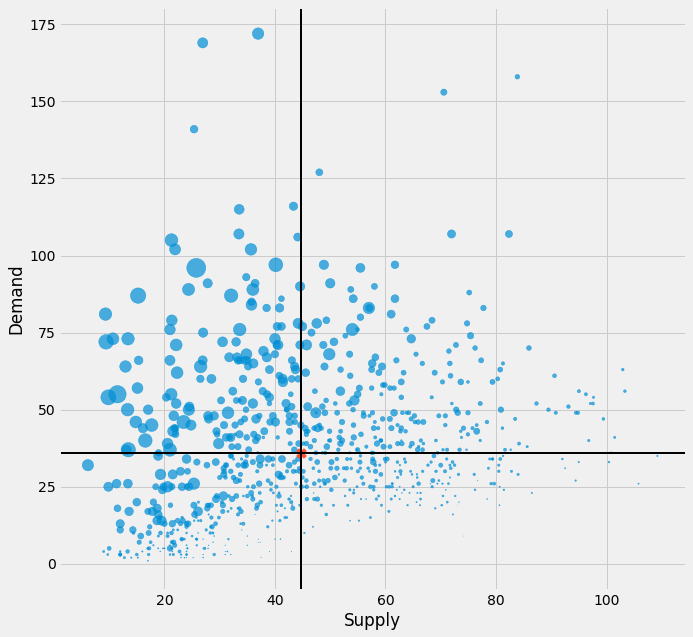

In [1074]:
# compare net income per driver for high vs low demand during peak hours 

supply = sd['Free Drivers']
demand = sd['Demand']

centroid_s = supply.mean()
centroid_d = demand.mean()

fig = plt.figure(figsize=(1, 10))
ax = plt.axes()
sc = ax.scatter(supply, demand, s=sd['net_income_per_driver']*sd['net_income_per_driver'], alpha =0.7)
plt.scatter(supply.mean(), demand.mean(), marker='x', s=60)
plt.xlabel("Supply")
plt.ylabel("Demand")

# add centroid lines dividing quadrants
ax.axvline(centroid_s, color='k', linewidth=2)
ax.axhline(centroid_d, color='k', linewidth=2)

#plt.text(35, 35, 'Q1', color='darkblue', size=12)
plt.show()

In [1080]:
# Net income on high demand high supply periods
sd[(demand> centroid_d) & (supply > centroid_s)].groupby('is_peak')['net_income_per_driver'].mean()

is_peak
False    4.912553
True     5.509190
Name: net_income_per_driver, dtype: float64

In [1081]:
# Net income on high demand and low supply periods
sd[(demand> centroid_d) & (supply < centroid_s)].groupby('is_peak')['net_income_per_driver'].mean()

is_peak
False    8.063378
True     9.536900
Name: net_income_per_driver, dtype: float64

In [1083]:
# Net income on low demand low supply periods
sd[(demand < centroid_d) & (supply < centroid_s)].groupby('is_peak')['net_income_per_driver'].mean()

is_peak
False    2.860671
True     6.183109
Name: net_income_per_driver, dtype: float64

In [1084]:
# Net income on low demand high supply periods
sd[(demand < centroid_d) & (supply > centroid_s)].groupby('is_peak')['net_income_per_driver'].mean()

is_peak
False    2.513329
True     2.737670
Name: net_income_per_driver, dtype: float64

/var/folders/nz/_1_4r28n6sd_j7432npcb9j40000gn/T/ipykernel_7875/2243088905.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


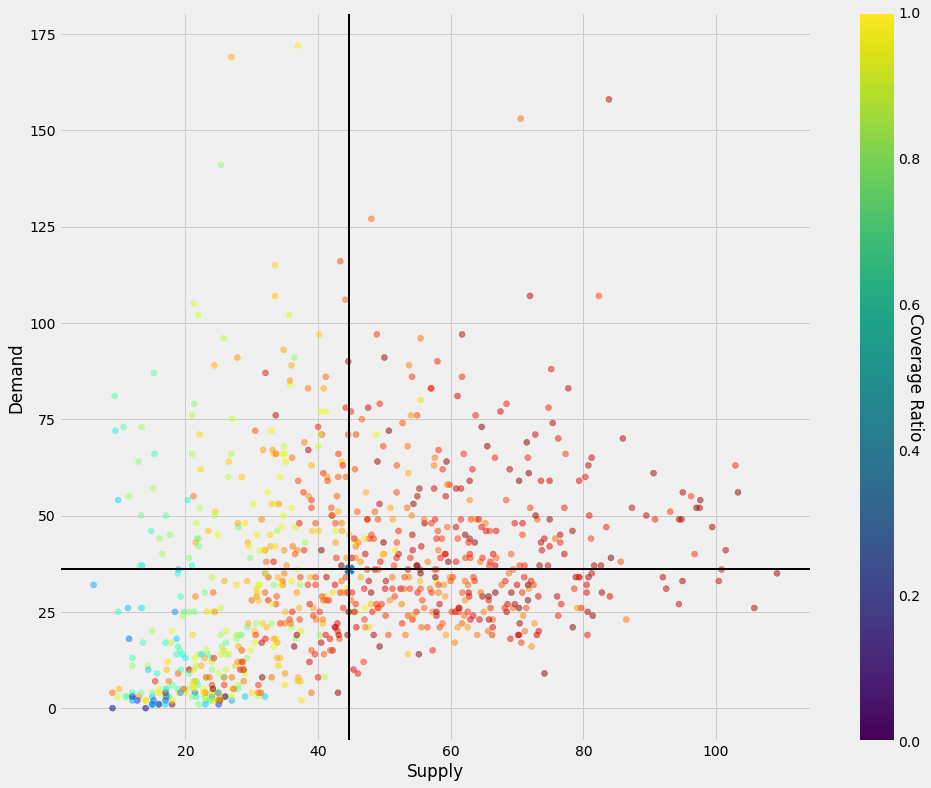

In [1100]:
# compare Coverage Ratio for high vs low demand during peak hours 
fig = plt.figure(figsize=(15, 12.5))
ax = plt.axes()
sc = ax.scatter(supply, demand, c=(sd['Coverage Ratio (%)']), alpha=0.5, cmap='jet')
plt.scatter(supply.mean(), demand.mean(), marker='x', s=60)
plt.xlabel("Supply")
plt.ylabel("Demand")

# add centroid lines dividing quadrants
ax.axvline(centroid_s, color='k', linewidth=2)
ax.axhline(centroid_d, color='k', linewidth=2)

# Plot colorbar
cbar = plt.colorbar()
cbar.ax.set_ylabel('Coverage Ratio', rotation=270)

#plt.text(35, 35, 'Q1', color='darkblue', size=12)
plt.show()

In [1075]:
sd[demand > centroid_d].groupby('is_peak')['Coverage Ratio (%)'].mean()

is_peak
False    83.559633
True     73.178571
Name: Coverage Ratio (%), dtype: float64

In [1077]:
sd[(demand> centroid_d) & (supply < centroid_s)].groupby('is_peak')['Coverage Ratio (%)'].mean()

is_peak
False    73.500000
True     64.363636
Name: Coverage Ratio (%), dtype: float64

In [1078]:
sd[demand < centroid_d].groupby('is_peak')['Coverage Ratio (%)'].mean()

is_peak
False    73.102138
True     70.716667
Name: Coverage Ratio (%), dtype: float64

In [1079]:
sd[supply < centroid_s].groupby('is_peak')['Coverage Ratio (%)'].mean()

is_peak
False    67.042424
True     63.007874
Name: Coverage Ratio (%), dtype: float64

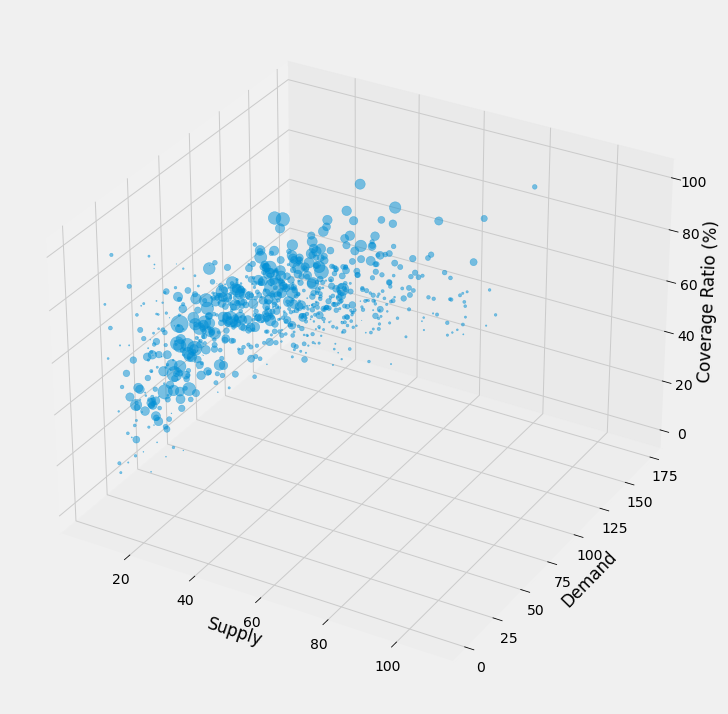

In [1091]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(supply, demand, sd['Coverage Ratio (%)'], s=pow(sd['net_income_per_driver'],2), alpha=0.5)

plt.xlabel("Supply")
plt.ylabel("Demand")
ax.set_zlabel("Coverage Ratio (%)")
plt.show()